In [ ]:
# Importing Analytic Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Accessing the data from Github repo
url = 'https://raw.githubusercontent.com/Kem98m/Power-Five-Conference-Data/main/maindata%20-%20locationdata.csv'
data = pd.read_csv(url)

Text(0.5, 1.0, 'Cumulative Number of NFL Players from each school')

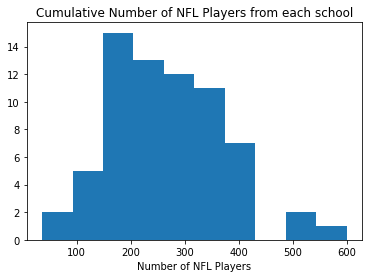

In [ ]:
#summary statistics
data.describe()
plt.hist(data['# of NFL Players'])
plt.xlabel('Number of NFL Players')
plt.title('Cumulative Number of NFL Players from each school')


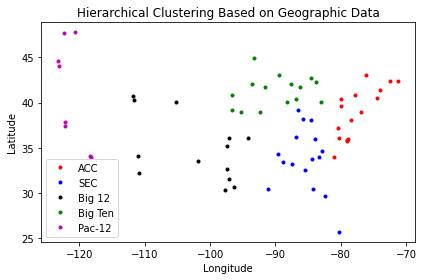

In [ ]:
# %% Hierarchical Clustering, location data only 

# Fetch location data and transform
longitude = data['Longitude'].to_numpy()
latitude = data['Latitude'].to_numpy()
names = data['Name'].to_numpy()
confs = data['Conference'].to_numpy()
X = np.column_stack((longitude, latitude))

# hierarchical clustering, complete linkage, n=5
hierarch = AgglomerativeClustering(n_clusters=5,linkage='complete').fit(X)
clusters = hierarch.labels_
locationsorted = np.column_stack((names,confs,longitude, latitude, clusters))
locationsorted = locationsorted[np.argsort(locationsorted[:,1])]

# Plot the clusters
fig, ax = plt.subplots(num=1,clear=True)
for k in range(0, len(clusters)): 
  if clusters[k] == 3: 
    acc, = ax.plot(longitude[k], latitude[k], 'r.')
acc.set_label('ACC')

for k in range(0, len(clusters)): 
  if clusters[k] == 1: 
    sec, = ax.plot(longitude[k], latitude[k], 'b.')
sec.set_label('SEC')
for k in range(0, len(clusters)): 
  if clusters[k] == 0: 
    big_12, = ax.plot(longitude[k], latitude[k], 'k.')
big_12.set_label('Big 12')
for k in range(0, len(clusters)): 
  if clusters[k] == 4: 
    big_10, = ax.plot(longitude[k], latitude[k], 'g.')
big_10.set_label('Big Ten')
for k in range(0, len(clusters)): 
  if clusters[k] == 2: 
    pac_12, = ax.plot(longitude[k], latitude[k], 'm.')
pac_12.set_label('Pac-12')
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hierarchical Clustering Based on Geographic Data')
fig.tight_layout()

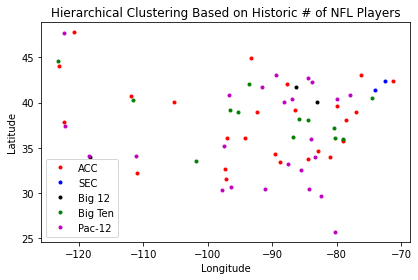

In [ ]:
# %% Hierarchical Clustering, Historic # of NFL Players

# Fetch location data and transform
players = data['# of NFL Players'].to_numpy().reshape(-1,1)
city_pop = data['Home City Population (Thousands)'].to_numpy().reshape(-1,1)
#X = np.column_stack((players))

# hierarchical clustering, complete linkage, n=5
hierarch2 = AgglomerativeClustering(n_clusters=5,linkage='complete').fit(players)
clusters2 = hierarch2.labels_
playersorted = np.column_stack((confs, clusters2))
playersorted = playersorted[np.argsort(locationsorted[:,0])]

# Plot the clusters
fig, ax = plt.subplots(num=1,clear=True)
for k in range(0, len(clusters2)): 
  if clusters2[k] == 1: 
    acc, = ax.plot(longitude[k], latitude[k], 'r.')
acc.set_label('ACC')

for k in range(0, len(clusters2)): 
  if clusters2[k] == 3: 
    sec, = ax.plot(longitude[k], latitude[k], 'b.')
sec.set_label('SEC')
for k in range(0, len(clusters2)): 
  if clusters2[k] == 2: 
    big_12, = ax.plot(longitude[k], latitude[k], 'k.')
big_12.set_label('Big 12')
for k in range(0, len(clusters2)): 
  if clusters2[k] == 4: 
    big_10, = ax.plot(longitude[k], latitude[k], 'g.')
big_10.set_label('Big Ten')
for k in range(0, len(clusters2)): 
  if clusters2[k] == 0: 
    pac_12, = ax.plot(longitude[k], latitude[k], 'm.')
pac_12.set_label('Pac-12')
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hierarchical Clustering Based on Historic # of NFL Players')
fig.tight_layout()


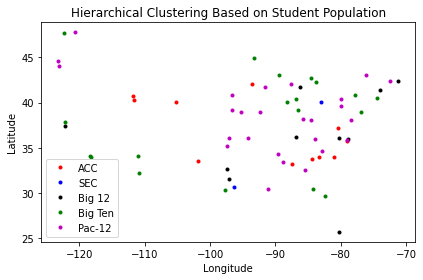

In [ ]:
# %% Hierarchical Clustering, Student Population

# Fetch location data and transform
student_pop = data['Student Population'].to_numpy().reshape(-1,1)
X = np.column_stack((city_pop, student_pop))

# hierarchical clustering, complete linkage, n=5
hierarch3 = AgglomerativeClustering(n_clusters=5,linkage='complete').fit(student_pop)
clusters3 = hierarch3.labels_
popsorted = np.column_stack((confs, clusters3))
popsorted = popsorted[np.argsort(popsorted[:,0])]

# Plot the clusters
fig, ax = plt.subplots(num=1,clear=True)
for k in range(0, len(clusters3)): 
  if clusters3[k] == 4: 
    acc, = ax.plot(longitude[k], latitude[k], 'r.')
acc.set_label('ACC')

for k in range(0, len(clusters3)): 
  if clusters3[k] == 3: 
    sec, = ax.plot(longitude[k], latitude[k], 'b.')
sec.set_label('SEC')
for k in range(0, len(clusters3)): 
  if clusters3[k] == 0: 
    big_12, = ax.plot(longitude[k], latitude[k], 'k.')
big_12.set_label('Big 12')
for k in range(0, len(clusters3)): 
  if clusters3[k] == 1: 
    big_10, = ax.plot(longitude[k], latitude[k], 'g.')
big_10.set_label('Big Ten')
for k in range(0, len(clusters3)): 
  if clusters3[k] == 2: 
    pac_12, = ax.plot(longitude[k], latitude[k], 'm.')
pac_12.set_label('Pac-12')
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hierarchical Clustering Based on Student Population')
fig.tight_layout()

In [ ]:
# %% Hierarchical Clustering, Graduation Rate

# Fetch location data and transform
latitude = data['Latitude'].to_numpy()
longitude = data['Longitude'].to_numpy()
student_pop = data['Student Population'].to_numpy()
gradrate = data['GRAD_RATE_2011_SA'].to_numpy()

X = np.column_stack((longitude, latitude, gradrate))

# hierarchical clustering, complete linkage, n=5
hierarch4 = AgglomerativeClustering(n_clusters=5,linkage='complete').fit(X)
clusters4 = hierarch4.labels_

gradsorted = np.column_stack((confs, clusters4))
gradsorted = gradsorted[np.argsort(gradsorted[:,0])]

# Plot the clusters
fig, ax = plt.subplots(num=1,clear=True)
for k in range(0, len(clusters4)): 
  if clusters4[k] == 0: 
    acc, = ax.plot(longitude[k], latitude[k], 'r.')
acc.set_label('ACC')

for k in range(0, len(clusters4)): 
  if clusters4[k] == 1: 
    sec, = ax.plot(longitude[k], latitude[k], 'b.')
sec.set_label('SEC')
for k in range(0, len(clusters4)): 
  if clusters4[k] == 2: 
    big_12, = ax.plot(longitude[k], latitude[k], 'k.')
big_12.set_label('Big 12')
for k in range(0, len(clusters4)): 
  if clusters4[k] == 3: 
    big_10, = ax.plot(longitude[k], latitude[k], 'g.')
big_10.set_label('Big Ten')
for k in range(0, len(clusters4)): 
  if clusters4[k] == 4: 
    pac_12, = ax.plot(longitude[k], latitude[k], 'm.')
pac_12.set_label('Pac-12')
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hierarchical Clustering Based on Historic # of NFL Players')
fig.tight_layout()

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

column_names = ["University", "Actual Conference", "Location (Latitude, Longitude)", "Historic # of NFL Players", "Student Population"]

x.add_column(column_names[0], locationsorted[:,0] )
x.add_column(column_names[1], locationsorted[:,1])  
x.add_column(column_names[2], locationsorted[:,4])  
x.add_column(column_names[3], playersorted[:,1])
x.add_column(column_names[4], popsorted[:,1])

print(x)


+-------------------------------------------+-------------------+--------------------------------+---------------------------+--------------------+
|                 University                | Actual Conference | Location (Latitude, Longitude) | Historic # of NFL Players | Student Population |
+-------------------------------------------+-------------------+--------------------------------+---------------------------+--------------------+
|           University of Virginia          |        ACC        |               3                |             1             |         2          |
|      North Carolina State University      |        ACC        |               3                |             0             |         4          |
|               Virginia Tech               |        ACC        |               3                |             0             |         4          |
|          University of Pittsburgh         |        ACC        |               3                |             1

In [ ]:


#newdata= data.dropna()
data
newdata = data[['Conference', '# of NFL Players', 'Latitude', 'Longitude' ]].copy()

#conf = {'Pac 12':0, 'SEC':1, 'Big 12':2, 'ACC': 3, 'Big Ten':4, 'Independent':5}
for i in range(len(newdata.Conference)):
  if (newdata.Conference[i] =='Pac 12'):
    newdata.Conference[i] = 0
  elif (newdata.Conference[i] == 'SEC'):
    newdata.Conference[i] = 1
  elif (newdata.Conference[i] == 'Big 12'):
    newdata.Conference[i] = 2
  elif (newdata.Conference[i] == 'ACC'):
    newdata.Conference[i] = 3
  elif (newdata.Conference[i] == 'Big Ten'):
    newdata.Conference[i] = 4
  else:
    newdata.Conference[i] = 5
pd.DataFrame(newdata)
print(newdata)

from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=6)
kmeans.fit(newdata)
y_means = kmeans.fit_predict(newdata)
plt.xlabel('Actual Conference')
plt.ylabel('Grad rate 2011')
for i in range(len(y_means)-1):
  if (y_means[i] ==0):
    plt.scatter(newdata.iloc[i,0], newdata.iloc[i,1], s=100, c='red')
  elif (y_means[i] ==1):
    plt.scatter(newdata.iloc[i,0], newdata.iloc[i,1], s=100, c='black')
  elif (y_means[i] ==2):
    plt.scatter(newdata.iloc[i,0], newdata.iloc[i,1], s=100, c='blue')
  elif (y_means[i] == 3):
    plt.scatter(newdata.iloc[i,0], newdata.iloc[i,1], s=100, c='cyan')
  else:
    plt.scatter(newdata.iloc[i,0], newdata.iloc[i,1], s=100, c='yellow')

In [ ]:
from sklearn.cluster import KMeans 
newdata = data[['# of NFL Players', 'Home City Population (Thousands)', 'Student Population']].copy()
newtarget = data[['Conference']].copy()

kmeans = KMeans(n_clusters=5, random_state=0).fit(newdata)
print(kmeans)

#kmeans = KMeans(n_clusters=5, random_state=42).fit(numOfPlayers, conference)
print(newdata)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
    # of NFL Players  Home City Population (Thousands)  Student Population
0                296                              1633               51585
1                317                                64               30440
2                239                               138               17217
3                241                               684               14720
4                172                               116               33517
..               ...                               ...                 ...
63               130                               692               12824
64               170                                44               34683
65               147                                42                8401
66               196                                33      